720
Index(['Time ', ' Algorithm', ' latency', ' cpuUsage', ' eventArrivalRate ',
       ' TransitionStatus'],
      dtype='object')


KeyError: 'QueryEndToEndLatencyPrediction'

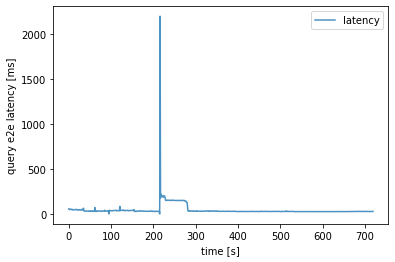

In [1]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import re

def group_data(d, tar):
    data = []
    current_op = d["Algorithm"][0]
    last = 0
    for i in range(0,len(d.Time)):
        new = d["Algorithm"].loc[i]
        if new != current_op:
            tmp = {"Time": d["Time"][last:i], "Algorithm": d["Algorithm"][last:i], tar: d[tar][last:i]}
            last = i
            current_op = new
            data.append(tmp)
    tmp = {"Time": d["Time"][last:], "Algorithm": d["Algorithm"][last:], tar: d[tar][last:]}
    data.append(tmp)
    return data


filepath = os.path.join("/home/niels/Downloads/mapek_transitions/lightweight/yahoo_geni_lightweight_latreq_30")
interval = 5
last_time = 3600
lat_req = 0
if "latreq" in filepath:
    lat_req = int(re.findall(r"latreq_\d+", filepath)[0].split("_")[1])

throughput_req = 0
if "freqreq" in filepath:
    throughput_req = int(re.findall(r"freqreq_\d+", filepath)[0].split("_")[1])


last_index = int(last_time / interval)
delim = "\t"
has_prediction = True
log_file = [y for x in os.walk(filepath) for y in glob(os.path.join(x[0], 'TransitionConfig*.csv'))][0]

#ax = df["latency"].plot()
#filename = '/home/niels/Downloads/data_collection/mininet_accident/sampling_1s/mininet_accident_1s_combined_samples.csv'
#logfile = 'yahoo_geni_1s_logs.csv'
#filename = "stats-Conjunction11bf7aeaea-87321827.csv"
#f = open(filename)
#df = pd.read_csv(f, sep=";", header=0)
#f.close()

with open(log_file) as l:
    log_df = pd.read_csv(l, sep=delim, header=0)
    log_df = log_df[0:last_index]
    throughput_req_start_index = int(len(log_df.index) / 2)

    print(len(log_df.index))
    #log_df = log_df[np.abs(log_df['latency'] - log_df['latency'].mean(axis=0)) <= 3 * log_df['latency'].std(axis=0)]
    #log_df = log_df[np.abs(log_df['eventArrivalRate'] - log_df['eventArrivalRate'].mean(axis=0)) <= 3 * log_df['eventArrivalRate'].std(axis=0)]
    #log_df = log_df[np.abs(log_df['QueryThroughputPrediction'] - log_df['QueryThroughputPrediction'].mean(axis=0)) <= 3 * log_df['QueryThroughputPrediction'].std(axis=0)]
    #log_df = log_df[np.abs(log_df['QueryEndToEndLatencyPrediction'] - log_df['QueryEndToEndLatencyPrediction'].mean(axis=0)) <= 3 * log_df['QueryEndToEndLatencyPrediction'].std(axis=0)]
    #log_df = log_df[0:last_index]

    print(log_df.columns)
    log_df.columns = log_df.columns.str.strip()  # fix messy whitespace in column names
    #log_df.set_index("Time", inplace=True)

    #runs = []
    #run_count = 1
    #run_length = int(last_time / run_count)#int(30 * (60 / interval))
    #new_index = pd.Index(list(range(0, run_length, interval)))
    #for i in range(0, run_length * run_count, run_length):
    #    runs.append(log_df[i:i + len(new_index)])
    #    runs[-1].set_index(new_index, inplace=True)

    #ax = runs[0]["latency"].plot( grid=True, xlabel='time [s]', ylabel="query e2e latency [ms]")
    targets = ["latency", "eventArrivalRate"]
    prediction_targets = ["QueryEndToEndLatencyPrediction", "QueryThroughputPrediction"]
    ylabels = ["query e2e latency [ms]", "events / %s seconds" % interval]
    for t in [0, 1]:
        #data_at_timesteps = pd.DataFrame()
        #prediction_at_timesteps = pd.DataFrame()
        #for timestep in range(0, last_time, interval):
            #print(runs[0].loc[[timestep]])
            #print(runs[1].loc[[timestep]])
            #data_at_timesteps[timestep] = [runs[i].loc[[timestep]][targets[t]] for i in range(0, run_count)]

            #if has_prediction:
                #prediction_at_timesteps[timestep] = [runs[i].loc[[timestep]][prediction_targets[t]] for i in range(0, run_count)]


        ax = log_df.plot(x="Time", y=targets[t], xlabel='time [s]', ylabel=ylabels[t], alpha=0.8)
        #data = data_at_timesteps
        #x = data.columns
        #mean = data.mean()
        #ax = mean.plot(xlabel='time [s]', ylabel=ylabels[t], alpha=0.8)
        '''
        # 300 represents number of points to make between T.min and T.max
        xnew = np.linspace(log_df.index.min(), log_df.index.max(), int(len(log_df.index) *0.25))
        spl = make_interp_spline(log_df.index, mean, k=3)  # type: BSpline
        power_smooth = spl(xnew)
        fig = plt.plot(xnew, power_smooth, alpha=0.8)
        '''
        #std = data.std()
        #low = mean - 2 * std
        #high = mean + 2 * std
        #palette = sns.color_palette()
        #ax.fill_between(x, low, high, alpha=0.2, color=palette.pop(0))

        # prediction
        if has_prediction:
            #data = log_df[targets[t]]
            #data = prediction_at_timesteps
            #mean = data.mean()
            #col = palette.pop(0)
            #ax = mean.plot(xlabel='time [s]', ylabel='predicted ' + ylabels[t], ax=ax, alpha=0.8)
            ax = log_df.plot(x="Time", y=prediction_targets[t], xlabel='time [s]', ylabel='predicted ' + ylabels[t], alpha=0.8, ax=ax)
            #std = data.std()
            #low = mean - 2 * std
            #high = mean + 2 * std
            #palette = sns.color_palette()
            #ax.fill_between(x, low, high, alpha=0.2, color=col)
            #ax.grid()
        plt.grid()
        ax.set(
            xlabel='time [s]',
            ylabel=ylabels[t]
        )
        #plt.legend(bbox_to_anchor=(1.0, 0.5))
        plt.legend([targets[t], "predicted"], loc='upper right')
        ax.set_ylim([0, log_df[targets[t]].mean(axis=0) + 3*log_df[targets[t]].std(axis=0)])
        plt.savefig('%s/predicted_vs_truth_%s.pdf' % (filepath, targets[t]), dpi=500)
        plt.show()


        plt.clf()
        ops = ["Rizou", "ProducerConsumer", "Relaxation", "GlobalOptimalBDP", "MDCEP", "Random"]
        palette = sns.color_palette()
        colormap = { op: palette.pop(0) for op in ops }
        lat_data = log_df
        lat_groups = group_data(lat_data, targets[t])
        flags = [True for op in ops]
        if t == 0:
            if lat_req > 0:
                plt.plot(lat_data.Time, [lat_req for _ in range(lat_data.shape[0])], label = "Requirement", color="black", linewidth=3, alpha=0.7)
        if t == 1:
            if throughput_req > 0:
                plt.plot(lat_data.Time, [throughput_req for _ in range(lat_data.shape[0])], label = "Requirement", color="black", linewidth=3, alpha=0.7)

        for g in lat_groups:
            cur_name = g["Algorithm"].head(1).item()
            if flags[ops.index(cur_name)]:
                ax = sns.lineplot(data=g, x="Time", y=targets[t],  color=colormap[cur_name], label=cur_name, linewidth=1, alpha=0.7)
                flags[ops.index(cur_name)] = False
            else:
                ax = sns.lineplot(data=g, x="Time", y=targets[t],  color=colormap[cur_name], linewidth=1, alpha=0.7)
        ax.set(
            xlabel='time [s]',
            ylabel=ylabels[t]
        )
        plt.grid()
        #if t == 0:
        #    ax.set_ylim([0, 160])
        #else:
        ax.set_ylim([log_df[targets[t]].min(), log_df[targets[t]].mean(axis=0) + 3*log_df[targets[t]].std(axis=0)])

        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.savefig(fname="%s/active_algorithm%s.pdf" % (filepath, targets[t]), dpi=500.0, format="pdf", transparent=True, bbox_inches='tight')
        plt.show()

# requirement fulfillment rate
throughput_fulfillment_rate = None
latency_fullfillment_rate = None
if throughput_req > 0:
    throughput_req_fulfilled = log_df["eventArrivalRate"][throughput_req_start_index:] > throughput_req
    throughput_counts = throughput_req_fulfilled.value_counts()
    total = throughput_counts.sum()
    throughput_fulfilled = throughput_counts.get(key=True)
    throughput_fulfillment_rate = float(throughput_fulfilled) / total

if lat_req > 0:
    lat_requirement_fulfilled = log_df["latency"] < lat_req
    latency_counts = lat_requirement_fulfilled.value_counts()
    total = latency_counts.sum()
    latency_fulfilled = latency_counts.get(key=True)
    latency_fullfillment_rate = float(latency_fulfilled / total)

with open(os.path.join(filepath, 'requirement_fulfillment.csv'), 'w') as f:
    if latency_fullfillment_rate is not None:
        f.write('latency_requirement;%s;fulfillment_rate;%s\n' % (lat_req, latency_fullfillment_rate))
    if throughput_fulfillment_rate is not None:
        f.write('throughput_requirement;%s;fulfillment_rate;%s' % (throughput_req, throughput_fulfillment_rate))


weighted_logfile = [y for x in os.walk(filepath) for y in glob(os.path.join(x[0], 'stats-weighted*.csv'))][0]
with open(weighted_logfile, 'r') as f:
    weighted_df = pd.read_csv(f, sep=";", header=None)
    weighted_df.columns = ["t", "time_b", "actor", "metric", "truth_name", "truth", "w_name", "weightedPred", "offline_n", "offline",
                           "online_n", "online", "weights_n", "weight_offline", "weight_online", "RAE_n", "RAE_offline", "RAE_online",
                           "onlinemodel_n", "online_model", "log_time"]
    procLatency_preds = weighted_df[ weighted_df.metric == "processingLatencyMean" ]
    procLatency_preds = procLatency_preds.drop(["time_b", "actor", "truth_name", "w_name", "offline_n", "online_n", "RAE_n", "onlinemodel_n", "log_time"], axis=1)
    throughput_preds = weighted_df[ weighted_df.metric == "eventRateOut" ]
    throughput_preds = throughput_preds.drop(["time_b", "actor", "truth_name", "w_name", "offline_n", "online_n", "RAE_n", "onlinemodel_n", "log_time"], axis=1)

    ax = throughput_preds.boxplot(column=["truth", "weightedPred", "offline", "online"], showfliers=False)
    ax.set(
        ylabel="eventRateOut"
    )
    plt.savefig(fname="%s/operator_predictions_%s_box.pdf" % (filepath, targets[t]), dpi=500.0, format="pdf", transparent=True)
    plt.show()

    frame_names = ["processingLatency", "eventRateOut"]
    frames = [procLatency_preds, throughput_preds]
    for i in [0, 1]:
        dataframe = frames[i]
        dataframe["abs_error"] = abs(dataframe["truth"] - dataframe["weightedPred"])
        dataframe["abs_error_offline"] = abs(dataframe["truth"] - dataframe["offline"])
        dataframe["abs_error_online"] = abs(dataframe["truth"] - dataframe["online"])
        dataframe["squared_error"] = (dataframe["truth"] - dataframe["weightedPred"]) ** 2
        dataframe["squared_error_offline"] = (dataframe["truth"] - dataframe["offline"]) ** 2
        dataframe["squared_error_online"] = (dataframe["truth"] - dataframe["online"]) ** 2
        plt.clf()
        fig, axes = plt.subplots(nrows=2, ncols=1) # create 2x1 array of subplots
        dataframe.boxplot(column=["abs_error", "abs_error_offline", "abs_error_online"], ax=axes[0], showfliers=False)
        dataframe.boxplot(column=["squared_error", "squared_error_offline", "squared_error_online"], ax=axes[1], showfliers=False)
        if frame_names[i] == "processingLatency":
            fig.get_axes()[0].set_yscale('log')
            fig.get_axes()[1].set_yscale('log')
        axes[0].set(ylabel='loss on %s' % frame_names[i])
        axes[1].set(ylabel="loss on %s" % frame_names[i])
        plt.savefig(fname="%s/operator_losses_%s_box.pdf" % (filepath, targets[t]), dpi=500.0, format="pdf", transparent=True)
        plt.show()

        # weights
        #ax = dataframe.boxplot(column=["weight_offline", "weight_online"], showfliers=False)
        #ax.set_yscale('log')
        #plt.show()
        counts_series = dataframe["online_model"].value_counts()
        print(counts_series)
        counts = dataframe["online_model"].value_counts()
        counts = pd.DataFrame(counts)
        counts = counts.reset_index()
        counts.columns = ['unique_values', 'counts'] #
        print(counts)
        with sns.plotting_context({"font.size": 16.0}):
            online_dict = { 'HoeffdingAdaptiveTree': 'HTreeAd', 'Linear': 'Lin', 'PA': 'PA', 'HoeffdingTree':'HTree'}
            dict = { val: online_dict[str(val).split("'")[3].split("Regress")[0]] for val in counts["unique_values"]}
            df1 = counts.replace({"unique_values": dict})
            df1["counts"] = df1["counts"] / df1["counts"].sum()
            print(df1)
            c = sns.catplot(data=df1, kind="bar", x="unique_values", y='counts', hue="unique_values", alpha=0.6)
            c.set_axis_labels("", "best %s prediction" % frame_names[i] )
            plt.grid()
            plt.savefig(fname="%s/used_online_model_counts_%s.pdf" % (filepath, targets[t]), dpi=500.0, format="pdf", transparent=True)
            plt.show()

        mse = dataframe["squared_error"].mean()
        rmse = mse ** 0.5
        mae = dataframe["abs_error"].mean()
        with open(os.path.join(filepath, 'operator_loss_weighted_offline_online.csv' ), 'a') as lossfile:
            if i == 0:
                lossfile.truncate(0)
            lossfile.write("metric;%s;RMSE;%s;MAE;%s\n" % (frame_names[i], rmse, mae))
'''
    plt.clf()
    plt.plot(log_df["eventArrivalRate"], label="event arrivals at consumer")
    plt.grid()
    plt.xlabel('time [s]')
    plt.ylabel('arrived events / interval')
    plt.show()


df = df._get_numeric_data()
#print(df)
numeric_headers = list(df.columns.values)
#print(numeric_headers)
#df = df[ np.abs(df['e2eLatencyMean'] - df['e2eLatencyMean'].mean(axis=0)) <= 2 * df['e2eLatencyMean'].std(axis=0) ]
#df['processingLatencyMean'] = df['processingLatencyMean'] * 1000
plt.clf()
plt.plot(df["processingLatencyMean"], label="processingLatencyMean", color="limegreen")
plt.grid()
plt.legend()
plt.ylabel("processingLatencyMean")
plt.xlabel("sample")
plt.show()

plt.clf()
plt.plot(df["eventRateOut"], label="eventRateOut", color="red")
plt.grid()
plt.legend()
plt.ylabel("eventRateOut")
plt.xlabel("sample")
plt.show()

df.to_csv('/tmp/samples_with_comma.csv', sep=',', index=None)
'''